<a href="https://colab.research.google.com/github/YangRyRay/cs480student/blob/main/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

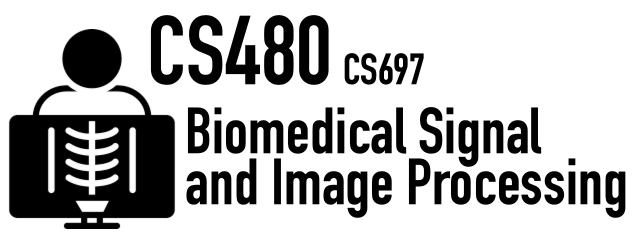
# Assignment 1


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

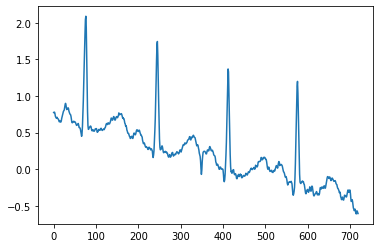

In [5]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
plot=plt.plot(ecg[8*SAMPLING_RATE:10*SAMPLING_RATE])
plt.show()

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 993kB 5.8MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


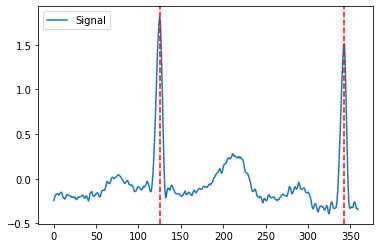

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

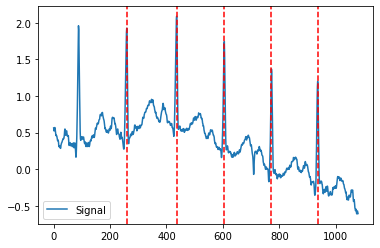

In [11]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
_, rpeaks9to11 = nk.ecg_peaks(ecg[7*SAMPLING_RATE:10*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks9to11['ECG_R_Peaks'], ecg[7*SAMPLING_RATE:10*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [12]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

rpeaks_delta = [(rpeaks9to11['ECG_R_Peaks'][i]-rpeaks9to11['ECG_R_Peaks'][i-1])/SAMPLING_RATE for i in range(len(rpeaks9to11['ECG_R_Peaks']))] # Calculate delta time between R peaks
rpeaks_delta.pop(0)                                                               # Remove the first element, garbage input
rpeaks_delta = [60/i for i in rpeaks_delta]                                       # Convert to BPM, standard units
print(rpeaks_delta)
rpeaks_delta_range = max(rpeaks_delta)-min(rpeaks_delta)                          # Calculate range of BPM to help determine arhytmia 
print(rpeaks_delta_range)
print(mean(rpeaks_delta))                                                         # Calculate mean to show representatieve heart rate


print("\nThe normalcy of the heartrate in question depends on the assumptions made about the patient. If we are assuming that the data is of a resting heart rate, then the heart rate is elevatated, and shows sign of Tachycardia. On the other hand, if we")
print("assume that the data is of an active heart rate, then it is within the expected range of a normal heart rate. In order to determine this, I found the delta time between observations of R-peaks by subtracting the index for one observation from")
print("the next, and dividing the resulting number by 360 to get the result in seconds. The units of this calculation is seconds per beat, in order to convert into beats per minute, I inverted the result to get beats per second and multiplied by 60 to") 
print("get beats per minute. Looking at the trend of the beats per minute and the range, it is possible that the data shows arhythmia, but I do not think there is enough data to support the call, it can be argued that since the beats per minute are")
print("continuously increasing, the subject is in a transient state from resting into active heart rate. I then calculated the average beats per minute (127.72 BPM) to evaluate the level of heart rate. If we assume that the subject is at a resting heart")
print("rate, the level at which it is considered elevated is 100 BPM. At 127 BPM, the subject's heart rate is elevated, and shows signs of Tachycardia. If the assumption is that the subject is in an active state, 127BPM can be considered normal.")

[122.03389830508475, 127.81065088757397, 129.34131736526945, 131.70731707317074]
9.673418768085995
127.72329590777474

The normalcy of the heartrate in question depends on the assumptions made about the patient. If we are assuming that the data is of a resting heart rate, then the heart rate is elevatated, and shows sign of Tachycardia. On the other hand, if we
assume that the data is of an active heart rate, then it is within the expected range of a normal heart rate. In order to determine this, I found the delta time between observations of R-peaks by subtracting the index for one observation from
the next, and dividing the resulting number by 360 to get the result in seconds. The units of this calculation is seconds per beat, in order to convert into beats per minute, I inverted the result to get beats per second and multiplied by 60 to
get beats per minute. Looking at the trend of the beats per minute and the range, it is possible that the data shows arhythmia, but I do not think t

**Task 4:** Detect P Q S T Peaks. [25 Points]

Yes, you can use nk.ecg_delineate to detectg PQRST waves


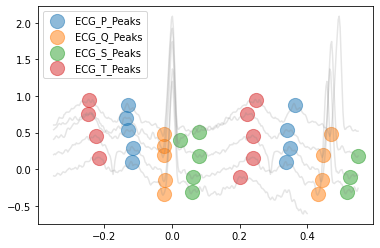

In [13]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

print("Yes, you can use nk.ecg_delineate to detectg PQRST waves")

_, waves_peak = nk.ecg_delineate(ecg[7*SAMPLING_RATE:10*SAMPLING_RATE], rpeaks9to11, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')


In [14]:
# TODO Does the detection work well?

print("Yes, the detection seems to work well. The wave is broken into segments, each containing 2 cycles. Judging by the way the heart beats are segmented, the algorithm defines the start of a cycle as the T-peak, but aligns the wave by the Q-peak.")
print("It seems that the R-peak plot supports this hypothesis, the initial R-peak is not recognized by the algorithm even though it is clearly visibly by sight. Looking before the R-peak, we can see the Q-peak, and the P-Peak, but the T-peak is cut off")
print("on the ascent (or descent, if you are reading the graph following the time domain). The final cycle also fails to display the last P-peak, even though it is present. Beyond that, every peak between the first and last T-Peak is properly identified,")
print("with the exception of one S-peak in the second wave. I assume this is caused by a peak outside the bounds of the graph, it is clear that the graph repeats each cycle twice (with the exception of the first identified cycle), once as the first wave,")
print("and once as the second. Each S-Peak is properly identified in the the first wave, so I believe that they were all identified, and that the missing S-peak is just out of bounds.") 

Yes, the detection seems to work well. The wave is broken into segments, each containing 2 cycles. Judging by the way the heart beats are segmented, the algorithm defines the start of a cycle as the T-peak, but aligns the wave by the Q-peak.
It seems that the R-peak plot supports this hypothesis, the initial R-peak is not recognized by the algorithm even though it is clearly visibly by sight. Looking before the R-peak, we can see the Q-peak, and the P-Peak, but the T-peak is cut off
on the ascent (or descent, if you are reading the graph following the time domain). The final cycle also fails to display the last P-peak, even though it is present. Beyond that, every peak between the first and last T-Peak is properly identified,
with the exception of one S-peak in the second wave. I assume this is caused by a peak outside the bounds of the graph, it is clear that the graph repeats each cycle twice (with the exception of the first identified cycle), once as the first wave,
and once as the 

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

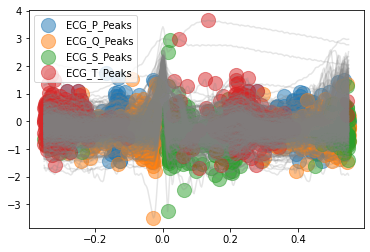

In [15]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_, rpeaksall = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg, rpeaksall, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

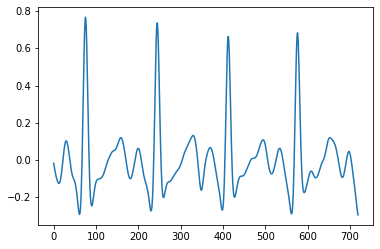

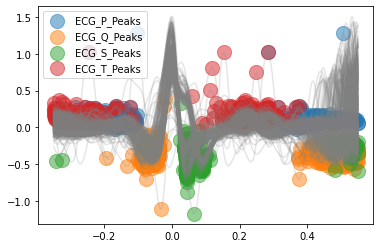

In [16]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

ecg_filtered= nk.signal_filter(ecg, lowcut=10, highcut=50, method='butterworth_ba', order=2)
plt.plot(ecg_filtered[8*SAMPLING_RATE:10*SAMPLING_RATE])
plt.show
_, waves_peak = nk.ecg_delineate(ecg_filtered, rpeaksall, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [18]:
# TODO Does the filtering improve the result?

print("Yes, the filtering has improved the results immensly. The lowcut filter helped rectify the baseline shift identified in the first part, and the highcut filter removed some of the noise we saw\n",
      "in tasks 2 and 4, which helped create a clearer picture of the cycle when each cycle is overlayed.")

Yes, the filtering has improved the results immensly. The lowcut filter helped rectify the baseline shift identified in the first part, and the highcut filter removed some of the noise we saw
 in tasks 2 and 4, which helped create a clearer picture of the cycle when each cycle is overlayed.


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#